In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Categorical v. Categorical

As with a single categorical variable, when it comes to comparing two categorical variables, there aren't that many options. Whereas a single categorical variable may be thought of as a marginal probability distribution over that variable, with two categorical variables we have a joint probability distribution of the two variables. Of course, we do want to make sure that we aren't missing any values or that there aren't unexpected categories ("A" versus "a", for example).

First, we need some data:

In [3]:
x = ["a"] * 25 + ["b"] * 72 + ["c"] * 12 + ["d"] * 49 + ["e"] * 33
data = pd.DataFrame(x)
data.columns = ["X"]

y_probs = {"a": [0.25, 0.5, 0.25], "b": [0.10, 0.10, 0.80], "c": [0.15, 0.43, 0.42], "d": [0.9, 0.05, 0.05], "e": [0.30, 0.60, 0.10]}

random.seed(3482752)

def generate_y(x):
    return random.choices(["m", "n", "p"], weights=y_probs[x])[0]

data["Y"] = data["X"].apply(lambda x: generate_y(x))
data.head()

X  Y
0  a  p
1  a  p
2  a  p
3  a  n
4  a  n

By the time we start to examine the pairwise relationship between $X$ and $Y$, we will have already examined each of the variable individually, which I repeat here just for reference:

In [4]:
data["X"].value_counts().sort_index()

a    25
b    72
c    12
d    49
e    33
Name: X, dtype: int64

In [5]:
data["Y"].value_counts().sort_index()

m    64
n    46
p    81
Name: Y, dtype: int64

Probably the most venerable *tabular* means of comparing two categorical variables is the *crosstab*, short for "cross tabluation". We can use Pandas to generate a cross tabluation of raw value counts:

In [6]:
print( pd.crosstab( data[ "X"], data[ "Y"]))

Y   m   n   p
X            
a   2  13  10
b   7   7  58
c   1   5   6
d  44   2   3
e  10  19   4


we can calculate relative frequencies as well but we have to do a bit of the work ourselves:

In [7]:
result = pd.crosstab( data[ "X"], data[ "Y"]).apply(lambda r: r/len(data), axis=1)
print( result)

Y         m         n         p
X                              
a  0.010471  0.068063  0.052356
b  0.036649  0.036649  0.303665
c  0.005236  0.026178  0.031414
d  0.230366  0.010471  0.015707
e  0.052356  0.099476  0.020942


If we scan a bit, we can find that the most probable (common) pairing is (b, p) and the least common pairing is (c, m).

There aren't really any good visualizations for multiple categorical variables. Remember the purpose of visualization isn't just pretty charts but to harness the innate pattern recognition capabilities of the our brains. One possibility might be a kind of *heat map* based on relative frequencies. As we've noted before, this might be good when the number of values for each variable exceeds 3 (so that there is more than 9 entries in the table). In large tables such as the one we currently have, it's very easy to miss important values just by scanning the numbers. The heatmap should help us.

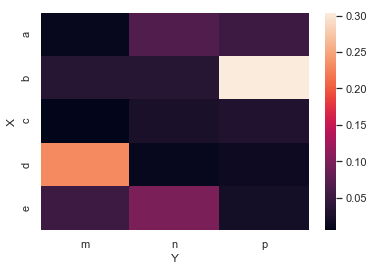

In [8]:
sns.heatmap(result)

and the higher percentages literally "pop" out of the grid. Of course, we run into the problem of intensities limited ability to convey numerical information (I can't look at those purples and see what the difference is, only that there's a difference). But still, this gives us a good starting point in the context of exploration.

You can think of a relative frequency table (cross tab) as a *joint* probability distribution. It follows that we might also want to look at *conditional* distributions, given the value of one variable, what is the probability of another variable.

The following table and heatmap show $P(Y|X)$:

Y         m         n         p
X                              
a  0.080000  0.520000  0.400000
b  0.097222  0.097222  0.805556
c  0.083333  0.416667  0.500000
d  0.897959  0.040816  0.061224
e  0.303030  0.575758  0.121212


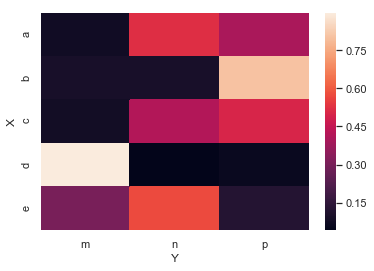

In [9]:
frequencies = pd.crosstab( data["X"], data["Y"]).apply(lambda r: r/r.sum(), axis=1)
print(frequencies)

sns.heatmap( frequencies)

This approach can be a bit more interesting. Given X, we can easily pick out the highest probability (most frequent class) of Y. For example, for $X=b$, we can see that the most frequent label is "p". This isn't particularly obvious in the table (generally because the low values and zeros are just noise). We can also look at $P(X|Y)$ (or as guided by the problem and domain knowledge). And as is a constant theme, fully understanding the ramifications of this data requires domain knowledge.